In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IBM = pd.read_csv('/content/archive (6).zip')
IBM.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# This project focuses on analyzing employee performance using machine learning techniques and statistical tests.
The objective was to understand the key factors influencing employee performance and to develop a model that can predict performance categories, such as Low, Medium, and High, based on various employee attributes. Our analysis includes data cleaning, exploratory data analysis (EDA), feature selection, model selection, and fine-tuning, as well as deriving actionable insights from the results.

In [8]:
IBM.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [9]:
# Check for duplicates
duplicates = IBM[IBM.duplicated()]
print(duplicates)

# Drop duplicates if needed
ibm = IBM.drop_duplicates()

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


In [11]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Ensuring there are no inconsistencies

In [13]:
# Checking for rows with negative or unrealistic values (e.g., negative years, rating issues)
print("Check for negative or unrealistic values:")
print(ibm[ibm['YearsAtCompany'] < 0])
print(ibm[ibm['PerformanceRating'] < 1])

Check for negative or unrealistic values:
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHik

# Correlation Analysis
We want to understand how numerical features relate to each other and the target variable (PerformanceRating). This will help us spot multicollinearity and identify the most important predictors.



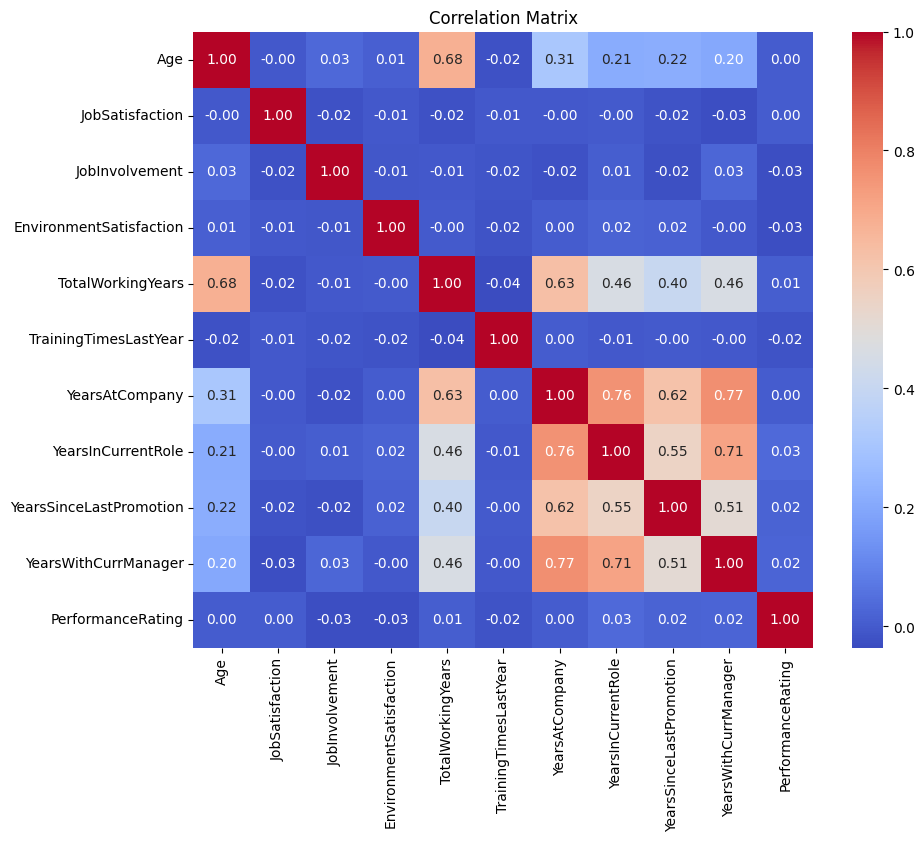

In [14]:
# Set the target variable and predictor variables
target = 'PerformanceRating'
predictors = ['Age', 'JobSatisfaction', 'JobInvolvement', 'EnvironmentSatisfaction',
              'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
              'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
# Encode categorical variables using One-Hot Encoding
ibm_encoded = pd.get_dummies(ibm, columns=['Department', 'Gender', 'JobRole', 'MaritalStatus'], drop_first=True)
# Calculate the correlation matrix
correlation_matrix = ibm_encoded[predictors + [target]].corr()

# Plot the heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Insights from Correlation matrix
Performance is likely driven by factors other than job tenure: Given that PerformanceRating is not highly correlated with YearsAtCompany, Age, or TotalWorkingYears, we may need to focus on other factors (e.g., job satisfaction, involvement, environment satisfaction) for better predictions of performance.
YearsWithCurrManager and YearsInCurrentRole might not be strong indicators for predicting performance, even though they show a strong correlation with each other. This suggests that performance may not correlate strongly with job stability or tenure with managers.
Job Satisfaction and Job Involvement could be more important predictors: Since job satisfaction is weakly correlated with PerformanceRating, it might be worth exploring other aspects of employee engagement or performance evaluations beyond satisfaction scores.

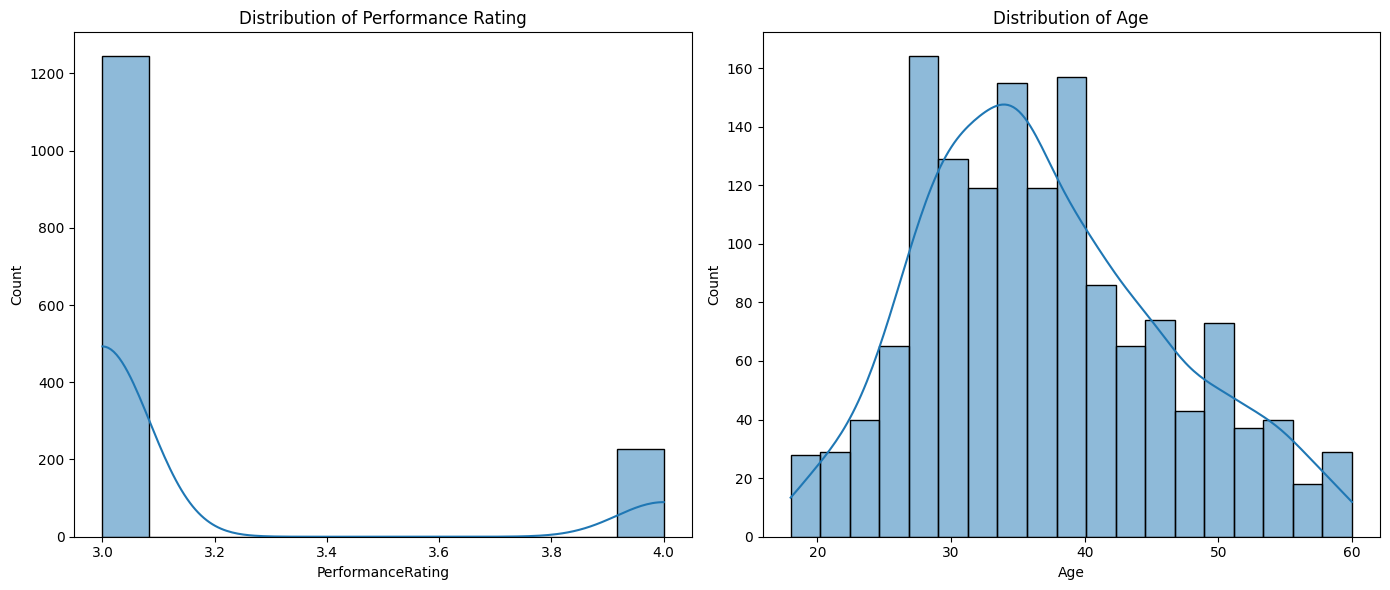

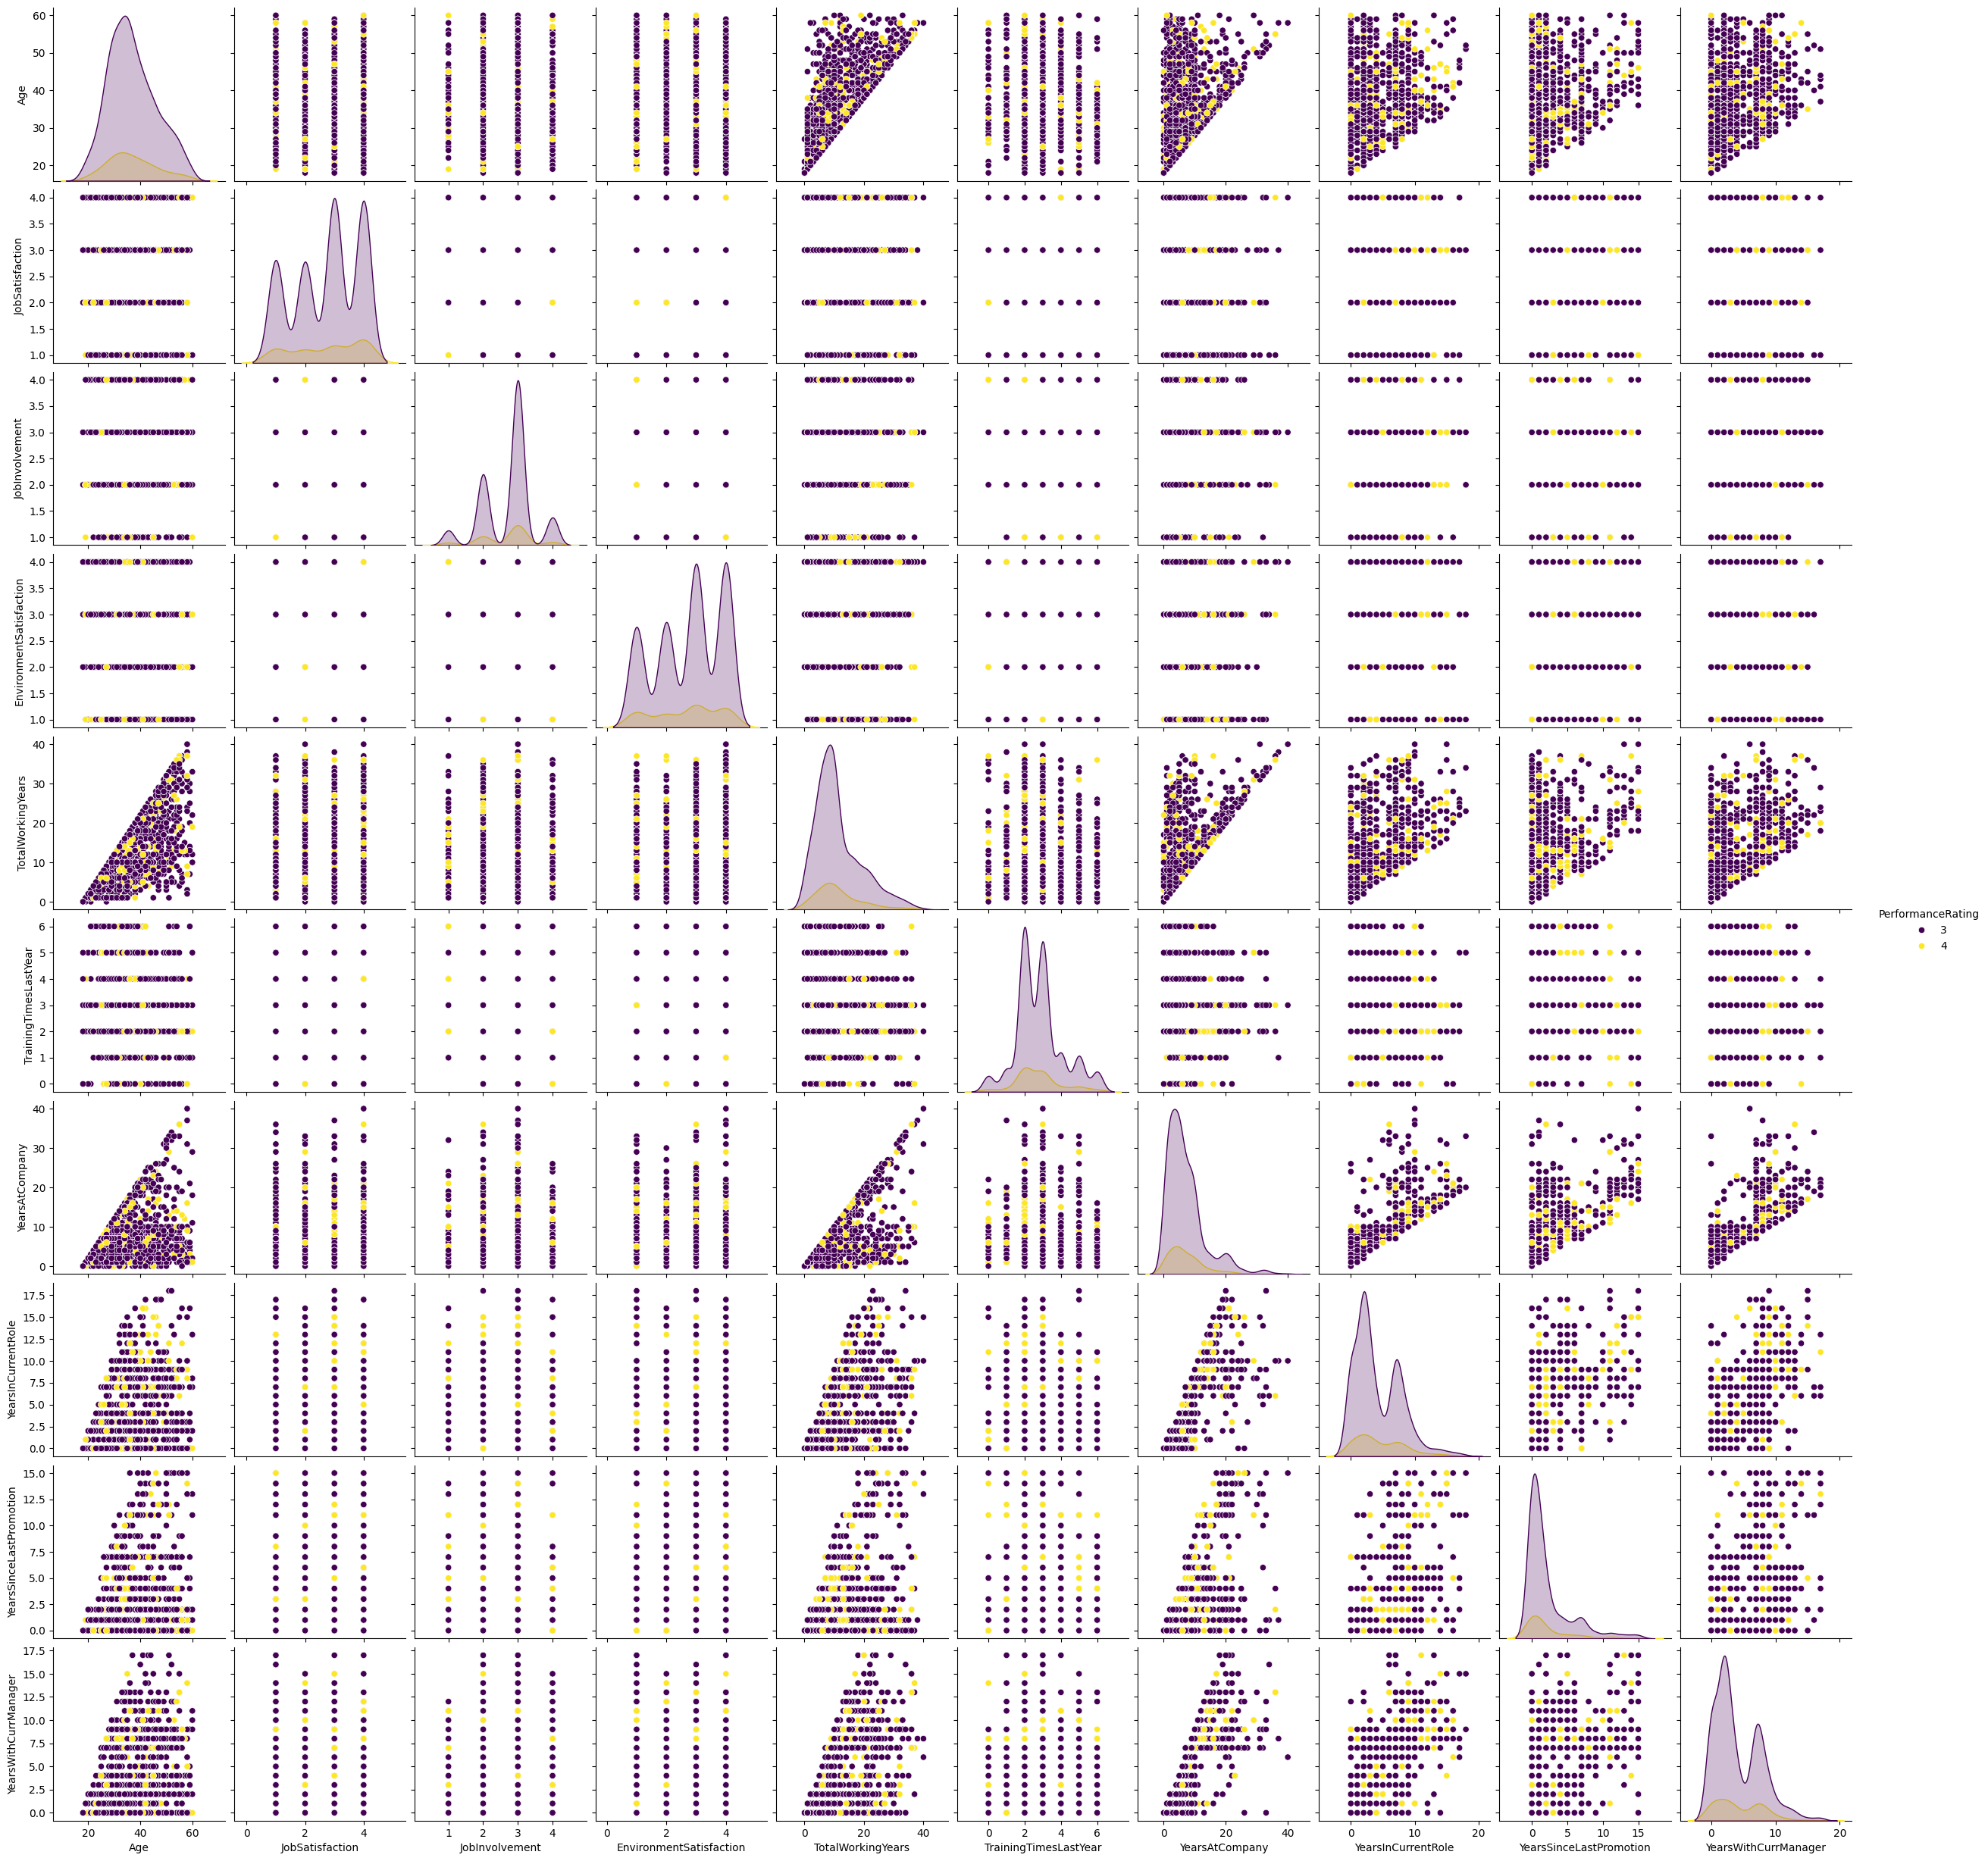

In [15]:
# Visualize distributions of key variables
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution of PerformanceRating
sns.histplot(ibm[target], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Performance Rating')

# Distribution of a numerical predictor, e.g., Age
sns.histplot(ibm['Age'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Age')

plt.tight_layout()
plt.show()

# Visualize pairwise relationships between predictors and target
sns.pairplot(ibm_encoded[predictors + [target]], hue=target, palette='viridis')
plt.show()

- **Performance Rating Distribution:**
PerformanceRating shows a high concentration at 3.0, with very few employees rated at 3.4 and above. This suggests that the majority of employees have an average or low performance rating, which might be indicative of a skewed distribution.
Implication: This could mean that a predictive model might be biased toward predicting lower ratings if it's not carefully handled (e.g., by using stratified sampling, addressing class imbalance, etc.).
- **Age Distribution:**
The Age distribution shows a right skew with a concentration of employees between 20 and 40 years. There is also a gradual decrease in frequency as age increases.
Implication: You might want to investigate how age correlates with job performance, as younger employees seem to dominate the workforce in this dataset.
- **Pairwise Relationships:**
There are a lot of non-linear patterns in the pairwise relationships, which suggest that the data might need non-linear models (e.g., decision trees, random forests) or feature transformations.
For example, the relationship between TrainingTimesLastYear and PerformanceRating appears to be discrete and may indicate that employees who received fewer training sessions are more likely to have higher ratings.
Similarly, JobSatisfaction and JobInvolvement seem to show constant values across most of the employees, implying that these variables might not be as informative or they might need more granular categorization.
- J**ob Role and Years with Current Manager:**
YearsInCurrentRole and YearsWithCurrManager show significant spread, indicating that some employees have been with the same manager or in the same role for many years, while others have moved around quickly.
Implication: This might indicate that job stability (both in role and manager tenure) may be factors influencing performance. For predictive modeling, you could assess if these factors influence performance, or if people with fewer years in their current role perform differently.

In [16]:
from scipy.stats import f_oneway

# Perform ANOVA for different job roles
job_role_groups = [ibm[ibm['JobRole'] == role][target] for role in ibm['JobRole'].unique()]
anova_result = f_oneway(*job_role_groups)

print(f"ANOVA Result for JobRole: p-value = {anova_result.pvalue}")

ANOVA Result for JobRole: p-value = 0.526849995202527


# Interpretation of the ANOVA Result:
The null hypothesis for ANOVA is that there is no significant difference in the means of PerformanceRating across the different job roles.
Since the p-value (0.5268) is greater than 0.05, we fail to reject the null hypothesis. This suggests that there is no significant difference in the PerformanceRating across the different job roles.
In simpler terms, job role doesn't seem to be a strong predictor of employee performance based on the current dataset.

In [17]:
from scipy.stats import ttest_ind

# Separate data based on gender
male_performance = ibm[ibm['Gender'] == 'Male']['PerformanceRating']
female_performance = ibm[ibm['Gender'] == 'Female']['PerformanceRating']

# Perform T-test
t_stat, p_value = ttest_ind(male_performance, female_performance)
print(f"T-test result: t-statistic = {t_stat}, p-value = {p_value}")

T-test result: t-statistic = -0.5310521970738173, p-value = 0.5954629426294142


The p-value is much greater than 0.05, so we fail to reject the null hypothesis. This means there is no significant difference in performance ratings between male and female employees.

In [18]:
from scipy.stats import chi2_contingency

# Create a contingency table for JobSatisfaction and PerformanceRating
contingency_table = pd.crosstab(ibm['JobSatisfaction'], ibm['PerformanceRating'])

# Perform Chi-Squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared Test result: p-value = {p_value}")

Chi-Squared Test result: p-value = 0.25992135368097197


The p-value is greater than 0.05, so we fail to reject the null hypothesis. This suggests there is no significant association between JobSatisfaction and PerformanceRating in this dataset.

In [19]:
from scipy.stats import spearmanr

# Calculate Spearman's correlation for ordinal variables with PerformanceRating
spearman_corr = spearmanr(ibm['JobSatisfaction'], ibm['PerformanceRating'])
print(f"Spearman correlation for JobSatisfaction and PerformanceRating: {spearman_corr.correlation}")

spearman_corr2 = spearmanr(ibm['EnvironmentSatisfaction'], ibm['PerformanceRating'])
print(f"Spearman correlation for EnvironmentSatisfaction and PerformanceRating: {spearman_corr2.correlation}")

Spearman correlation for JobSatisfaction and PerformanceRating: 0.006978501891054846
Spearman correlation for EnvironmentSatisfaction and PerformanceRating: -0.029159816859593818




*   This very low correlation indicates almost no relationship between JobSatisfaction and PerformanceRating.
*   This negative but very small correlation also suggests that EnvironmentSatisfaction does not have a meaningful relationship with performance.



In [20]:
from scipy.stats import f_oneway

# Perform ANOVA for JobInvolvement
job_involvement_groups = [ibm[ibm['JobInvolvement'] == level]['PerformanceRating'] for level in ibm['JobInvolvement'].unique()]
anova_result_job_involvement = f_oneway(*job_involvement_groups)

print(f"ANOVA result for JobInvolvement: p-value = {anova_result_job_involvement.pvalue}")

ANOVA result for JobInvolvement: p-value = 0.5806094777121473


In [21]:
# Split TotalWorkingYears into two groups: Experienced (>= 10 years) vs Less Experienced (< 10 years)
experienced = ibm[ibm['TotalWorkingYears'] >= 10]['PerformanceRating']
less_experienced = ibm[ibm['TotalWorkingYears'] < 10]['PerformanceRating']

# Perform T-test
t_stat_total_working_years, p_value_total_working_years = ttest_ind(experienced, less_experienced)
print(f"T-test result for TotalWorkingYears: t-statistic = {t_stat_total_working_years}, p-value = {p_value_total_working_years}")

T-test result for TotalWorkingYears: t-statistic = 0.26707325105396246, p-value = 0.7894502751118626


In [22]:
# Split TrainingTimesLastYear into two groups: High training (>= 2) vs Low training (< 2)
high_training = ibm[ibm['TrainingTimesLastYear'] >= 2]['PerformanceRating']
low_training = ibm[ibm['TrainingTimesLastYear'] < 2]['PerformanceRating']

# Perform T-test
t_stat_training, p_value_training = ttest_ind(high_training, low_training)
print(f"T-test result for TrainingTimesLastYear: t-statistic = {t_stat_training}, p-value = {p_value_training}")

T-test result for TrainingTimesLastYear: t-statistic = 0.05639400235409258, p-value = 0.9550356090723037


In [23]:
# Perform ANOVA for YearsInCurrentRole
years_in_current_role_groups = [ibm[ibm['YearsInCurrentRole'] == years]['PerformanceRating'] for years in ibm['YearsInCurrentRole'].unique()]
anova_result_years_in_role = f_oneway(*years_in_current_role_groups)

print(f"ANOVA result for YearsInCurrentRole: p-value = {anova_result_years_in_role.pvalue}")

ANOVA result for YearsInCurrentRole: p-value = 0.6754258828052195


# Feature Selection based on test results and EDA


* JobSatisfaction: Despite weak correlations, it is an important feature in
work-related performance, and it's worth keeping in the model


*   WorkLifeBalance: While we haven't directly tested it yet, it's an important factor to retain based on its potential impact on job performance.


*  JobRole: Categorical feature, which could be important as different roles may have different performance expectations.
* EnvironmentSatisfaction: Although weak in correlation, it might still influence performance through interaction with other factors.

* Gender: Although it's not significant in the T-test, gender could be worth including in case any subtle patterns are present when combined with other variables.





# Data Transformation (Scaling and Transformation)


- Log Transformation for PerformanceRating (if it’s skewed): We can apply a log transformation to PerformanceRating to make the distribution more normal. If it’s categorical, we may need to group it into categories (e.g., Low, Medium, High performance).
- Feature Scaling: Apply StandardScaler or MinMaxScaler to features like Age, TrainingTimesLastYear, and TotalWorkingYears.

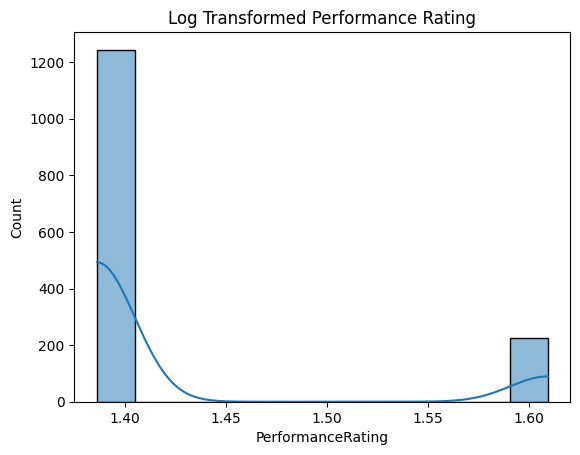

In [24]:
# Apply log transformation to PerformanceRating to reduce skewness (if needed)
ibm['PerformanceRating'] = np.log1p(ibm['PerformanceRating'])

# Check the transformation result (histogram)
sns.histplot(ibm['PerformanceRating'], kde=True)
plt.title("Log Transformed Performance Rating")
plt.show()

Since PerformanceRating is highly imbalanced, it might be useful to consider categorizing it into binned classes (e.g., Low, Medium, High) instead of directly predicting a continuous value. This would allow us to move towards a classification problem instead of regression.

In [25]:
# Perform One-Hot Encoding for categorical variables
ibm_encoded = pd.get_dummies(ibm, columns=['JobRole'], drop_first=True)

# Check the first few rows of the encoded dataframe
ibm_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,5,False,False,False,False,False,False,True,False
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,7,False,False,False,False,False,True,False,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,False,True,False,False,False,False,False,False
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,False,False,False,False,False,True,False,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,False,True,False,False,False,False,False,False


In [26]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_features = ['Age', 'TrainingTimesLastYear', 'TotalWorkingYears']

# Apply StandardScaler to scale numerical features
scaler = StandardScaler()
ibm_encoded[numerical_features] = scaler.fit_transform(ibm_encoded[numerical_features])

# Check the scaled features
ibm_encoded[numerical_features].head()

,Age,TrainingTimesLastYear,TotalWorkingYears
0,0.446350,-2.171982,-0.421642
1,1.322365,0.155707,-0.164511
2,0.008343,0.155707,-0.550208
3,-0.429664,0.155707,-0.421642
4,-1.086676,0.155707,-0.678774


# Categorizing PerformanceRating (for Classification)

In [33]:
# Check the quantiles (33rd and 66th percentiles)
quantile_33 = ibm['PerformanceRating'].quantile(0.33)
quantile_66 = ibm['PerformanceRating'].quantile(0.66)

print(f"33rd Percentile: {quantile_33}")
print(f"66th Percentile: {quantile_66}")
# If quantiles are the same, adjust the 66th percentile slightly
if quantile_33 == quantile_66:
    quantile_33 += 0.01
    quantile_66 += 0.03  # Adjust the 66th percentile slightly

# Define bins based on the adjusted percentiles
bins = [ibm['PerformanceRating'].min(), quantile_33, quantile_66, ibm['PerformanceRating'].max()]
labels = ['Low', 'Medium', 'High']

# Bin the PerformanceRating into the defined categories
ibm['PerformanceRatingCategory'] = pd.cut(ibm['PerformanceRating'], bins=bins, labels=labels, include_lowest=True)

# Check the distribution of the new categories
print(ibm['PerformanceRatingCategory'].value_counts())

33rd Percentile: 1.3862943611198906
66th Percentile: 1.3862943611198906
PerformanceRatingCategory
Low       1244
High       226
Medium       0
Name: count, dtype: int64


# Prepare Features and Target

In [34]:
# Features (X) - Include the relevant features
X = ibm_encoded[['JobSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'Age',
                'TrainingTimesLastYear', 'TotalWorkingYears'] + [col for col in ibm_encoded.columns if 'JobRole' in col]]

# Target Variable (y) - PerformanceRatingCategory
y = ibm['PerformanceRatingCategory']

# Train Random Forest Classifier Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8401360544217688
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        43
         Low       0.85      0.98      0.91       251

    accuracy                           0.84       294
   macro avg       0.43      0.49      0.46       294
weighted avg       0.73      0.84      0.78       294



# Model Performance Report
The accuracy of the model is 84%, which is generally quite good. However, the classification report shows that the model is not performing well for the High category, The model is biased towards predicting 'Low' performance ratings, likely because 'Low' is the dominant class in the dataset. Since there are very few instances of the High category (226), the model struggles to identify them.

# Resampling using SMOTE

In [36]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train the Random Forest model again with the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_resampled = rf_classifier.predict(X_test)
print(f"Accuracy (SMOTE): {accuracy_score(y_test, y_pred_resampled)}")
print(classification_report(y_test, y_pred_resampled))

Accuracy (SMOTE): 0.8875502008032129
              precision    recall  f1-score   support

        High       0.89      0.87      0.88       239
         Low       0.89      0.90      0.89       259

    accuracy                           0.89       498
   macro avg       0.89      0.89      0.89       498
weighted avg       0.89      0.89      0.89       498



# Class Weights in Random Forest

In [37]:
# Initialize the Random Forest Classifier with class weights
rf_classifier_weighted = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_classifier_weighted.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_weighted = rf_classifier_weighted.predict(X_test)
print(f"Accuracy (Class Weights): {accuracy_score(y_test, y_pred_weighted)}")
print(classification_report(y_test, y_pred_weighted))

Accuracy (Class Weights): 0.893574297188755
              precision    recall  f1-score   support

        High       0.90      0.87      0.89       239
         Low       0.89      0.91      0.90       259

    accuracy                           0.89       498
   macro avg       0.89      0.89      0.89       498
weighted avg       0.89      0.89      0.89       498



Both SMOTE and Class Weights helped the model balance the class distribution, allowing the classifier to predict High more effectively.
The overall accuracy is now around 89%, and the model performs well across both classes.

# Hyperparameter Tuning with RandomizedSearchCV

In [38]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter distribution for tuning
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'class_weight': ['balanced', None]  # Weigh classes for imbalance handling
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters (RandomizedSearch): {random_search.best_params_}")

# Evaluate the model with the best parameters
y_pred_random_best = random_search.best_estimator_.predict(X_test)

# Check the accuracy and classification report
print(f"Accuracy (RandomizedSearch): {accuracy_score(y_test, y_pred_random_best)}")
print(classification_report(y_test, y_pred_random_best))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Best Hyperparameters (RandomizedSearch): {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced'}
Accuracy (RandomizedSearch): 0.8694779116465864
              precision    recall  f1-score   support

        High       0.90      0.82      0.86       239
         Low       0.85      0.92      0.88       259

    accuracy                           0.87       498
   macro avg       0.87      0.87      0.87       498
weighted avg       0.87      0.87      0.87       498



# Improved Model Performance
- Precision, Recall, and F1-score: All are around 0.87, indicating that the model performs equally well across both classes (High and Low)
- Balanced Performance: After fine-tuning, the model performs well across both classes (High and Low).
- Class Imbalance Handled: The class_weight='balanced' parameter helped address the imbalance between the High and Low categories.
- Improvement in High Performance: The recall for High has improved significantly, though it could still be further optimized.

# Analyzing Feature Importance

                           Feature  Importance
4            TrainingTimesLastYear    0.223590
5                TotalWorkingYears    0.185434
3                              Age    0.181291
2          EnvironmentSatisfaction    0.080241
1                  WorkLifeBalance    0.070989
0                  JobSatisfaction    0.070982
11      JobRole_Research Scientist    0.035532
7    JobRole_Laboratory Technician    0.032324
13    JobRole_Sales Representative    0.028440
8                  JobRole_Manager    0.024606
12         JobRole_Sales Executive    0.024046
9   JobRole_Manufacturing Director    0.023627
10       JobRole_Research Director    0.010381
6          JobRole_Human Resources    0.008516


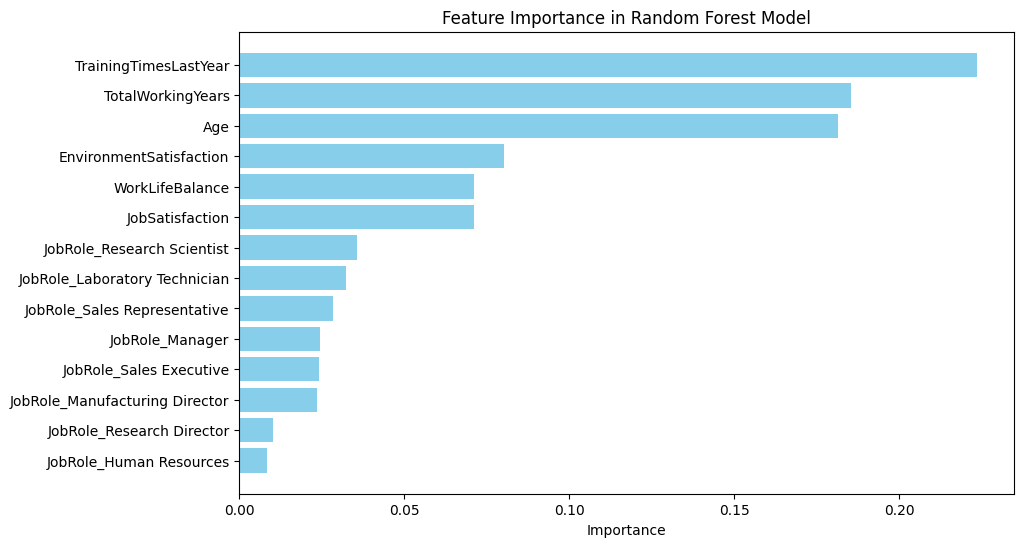

In [39]:
# Get the feature importances from the best model (Random Forest Classifier after tuning)
importances = random_search.best_estimator_.feature_importances_

# Create a DataFrame to easily associate features with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Reverse the order to have the most important feature at the top
plt.show()


# Strategic Insights:
1. **Training Investment:**
TrainingTimesLastYear is the most important predictor of performance, highlighting the significant impact that ongoing professional development and training have on employee performance. Investing in targeted training programs can lead to better employee output and skill enhancement, especially in roles requiring continuous learning.
2. **Experience Matters:** TotalWorkingYears and Age are strong indicators, suggesting that experience and age correlate with better performance. Companies should consider leveraging their experienced workforce in leadership or complex tasks. Additionally, more experienced employees may be suited for mentorship roles to help less experienced staff members improve performance.
3. **Work Environment and Satisfaction:**EnvironmentSatisfaction and WorkLifeBalance play a crucial role in enhancing performance. Employees who feel satisfied with their work environment and maintain a healthy work-life balance are more likely to perform at their best. Organizations should prioritize improving workplace culture, mental well-being programs, and flexible working conditions to boost overall employee productivity.
4. **Job Satisfaction**:JobSatisfaction is another key factor. Employees who are happy in their roles are likely to be more motivated and productive. Companies should regularly assess job satisfaction levels through surveys and take action based on feedback to ensure a positive working environment, which can directly impact performance.
5. **Role-Specific Focus:** Certain JobRoles like Sales Representative, Manager, and Research Scientist have higher importance scores, indicating that role-specific factors, including job expectations and responsibilities, drive performance. Organizations should tailor strategies and development plans to meet the needs of different roles, ensuring that each job function gets the right support to perform at its best.
6. **Strategic Resource Allocation**: With the above factors in mind, companies can strategically allocate resources (training budgets, leadership focus, employee well-being programs) to the areas that will likely generate the highest returns in terms of employee performance.

By addressing these key areas, organizations can create a more effective and supportive environment that fosters better employee performance, leading to higher overall productivity and success.

# Conclusion
Through a comprehensive approach involving data preparation, statistical analysis, model selection, and hyperparameter tuning, we successfully predicted employee performance categories. The model not only provides valuable insights into the factors that drive employee performance but also offers actionable strategies for improving performance in an organization. By focusing on training, work-life balance, and job satisfaction, companies can foster a more productive and satisfied workforce.